In [1]:
from fastai.vision.all import *

In [2]:
path = Path.home()/'paddy'

In [3]:
path

Path('/root/paddy')

In [4]:
path.ls()

(#5) [Path('/root/paddy/train_images'),Path('/root/paddy/train.csv'),Path('/root/paddy/sample_submission.csv'),Path('/root/paddy/paddy-disease-classification.zip'),Path('/root/paddy/test_images')]

In [5]:
Path.BASE_PATH = path

In [6]:
path.ls()

(#5) [Path('train_images'),Path('train.csv'),Path('sample_submission.csv'),Path('paddy-disease-classification.zip'),Path('test_images')]

In [7]:
import pandas

In [8]:
df = pandas.read_csv(path/'train.csv')

In [9]:
df

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45
...,...,...,...,...
10402,107607.jpg,tungro,Zonal,55
10403,107811.jpg,tungro,Zonal,55
10404,108547.jpg,tungro,Zonal,55
10405,110245.jpg,tungro,Zonal,55


In [10]:
trn_path = path/'train_images'

In [11]:
blb_path = trn_path/'bacterial_leaf_blight'

In [12]:
img = PILImage.create(blb_path/'100330.jpg')

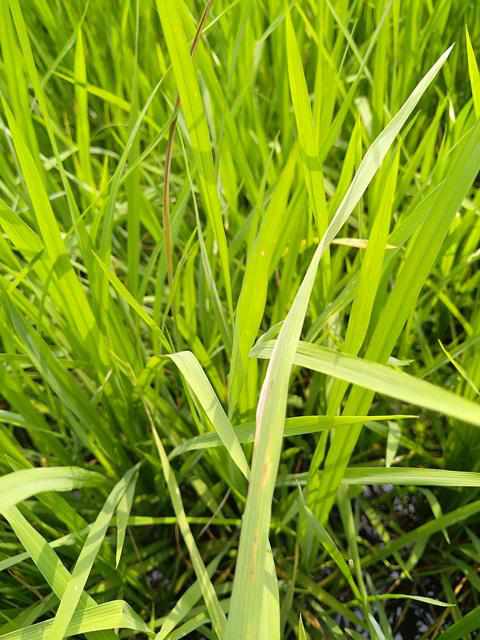

In [13]:
img

In [14]:
img.size

(480, 640)

In [15]:
files = get_image_files(trn_path)

In [16]:
files

(#10407) [Path('train_images/bacterial_leaf_streak/100081.jpg'),Path('train_images/bacterial_leaf_streak/104135.jpg'),Path('train_images/bacterial_leaf_streak/108249.jpg'),Path('train_images/bacterial_leaf_streak/100235.jpg'),Path('train_images/bacterial_leaf_streak/105265.jpg'),Path('train_images/bacterial_leaf_streak/109925.jpg'),Path('train_images/bacterial_leaf_streak/106054.jpg'),Path('train_images/bacterial_leaf_streak/103307.jpg'),Path('train_images/bacterial_leaf_streak/106974.jpg'),Path('train_images/bacterial_leaf_streak/101151.jpg')...]

In [17]:
img = PILImage.create(files[0]);

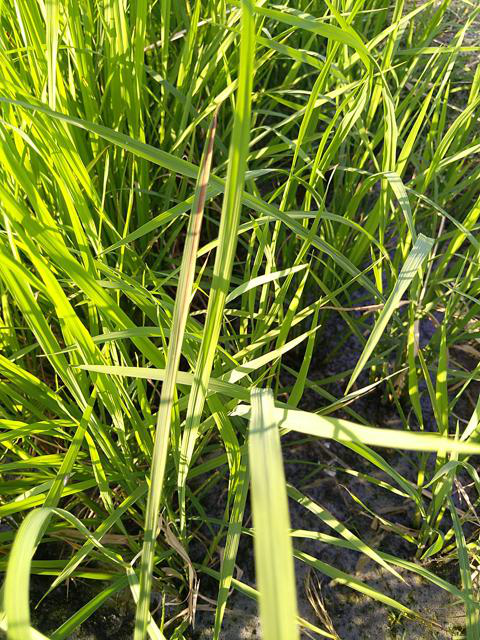

In [18]:
img

In [19]:
[PILImage.create(o).size for o in files[:10]]

[(480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640)]

In [20]:
df.variety.value_counts()

ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: variety, dtype: int64

In [23]:
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.2, seed=42, item_tfms=Resize(224)) 

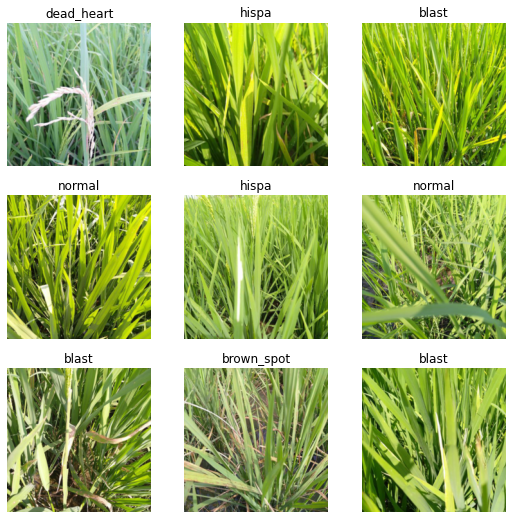

In [24]:
dls.show_batch()

In [25]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [26]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.921593,1.099219,0.344065,01:15


epoch,train_loss,valid_loss,error_rate,time
0,0.741826,0.430776,0.144642,01:36
